In [53]:
import pandas as pd
import pylab as pl
import numpy as np
import statsmodels.formula.api as smf

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"

allmales={}
allfemales={}
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls', header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

In [4]:
allmales['all'][0:4]

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,108706,4407,2665,3200,4027,4418,3333,5027,3807,...,513,626,457,12003,35228,211,50779,447,0.501,0.0033
2,Earnings,83555,3217,2326,2560,1964,3118,1505,3451,1959,...,246,559,259,10113,39903,437,54086,531,0.489,0.0039
3,..Wages and Salary,78263,2779,2184,2419,1780,2777,1365,3149,1847,...,244,540,257,9392,40298,167,54268,543,0.483,0.004


In [7]:
for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,allmales['white']['Median income'][:].values,allmales['black']['Median income'][:].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())

all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,allfemales['white']['Median income'][:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())

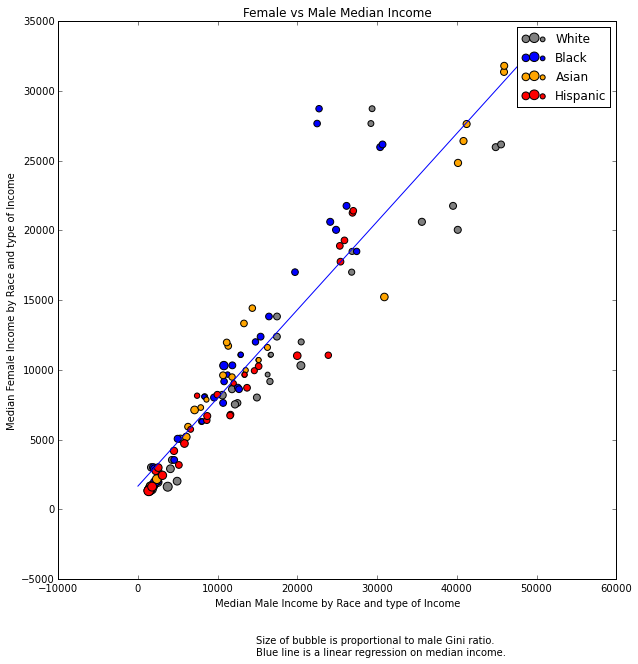

In [83]:
all_males_df = allmales['white'][['Median income']].astype(float)
all_females_df = allfemales['white'][['Median income']].astype(float)

all_males_df = pd.DataFrame([all_males]).astype(float)
all_females_df = pd.DataFrame([all_females]).astype(float)

data = pd.concat([all_males_df.T,all_females_df.T],axis=1)
data.columns=['male','female']

model = smf.ols('female ~ male',data=data[0:10]).fit()
intercept = model.params[0]
slope = model.params[1]

x = np.linspace(0,48000)
y = intercept + slope*x

fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111)
white = ax.scatter(allmales['white'][['Median income']].astype(float),allfemales['black'][['Median income']].astype(float),c='grey',s=allmales['white']['Gini ratio']*100)
black = ax.scatter(allmales['black'][['Median income']].astype(float),allfemales['black'][['Median income']].astype(float),c='blue',s=allmales['black']['Gini ratio']*100)
asian = ax.scatter(allmales['asian'][['Median income']].astype(float),allfemales['asian'][['Median income']].astype(float),c='orange',s=allmales['asian']['Gini ratio']*100)
hispanic = ax.scatter(allmales['hispanic'][['Median income']].astype(float),allfemales['hispanic'][['Median income']].astype(float),c='red',s=allmales['hispanic']['Gini ratio']*100)

ax.set_xlabel('Median Male Income by Race and type of Income')
ax.set_ylabel('Median Female Income by Race and type of Income')
ax.set_title("Female vs Male Median Income")
line = ax.plot(x,y,label="linear regression")

ax.legend([white,black,asian,hispanic],['White','Black','Asian','Hispanic'])

#fig.text(15,-15,'hello')
figtext(0.4, 0.02, "Size of bubble is proportional to male Gini ratio.\nBlue line is a linear regression on median income.")